In [3]:
                                  #Effectiveness of the Capping Product

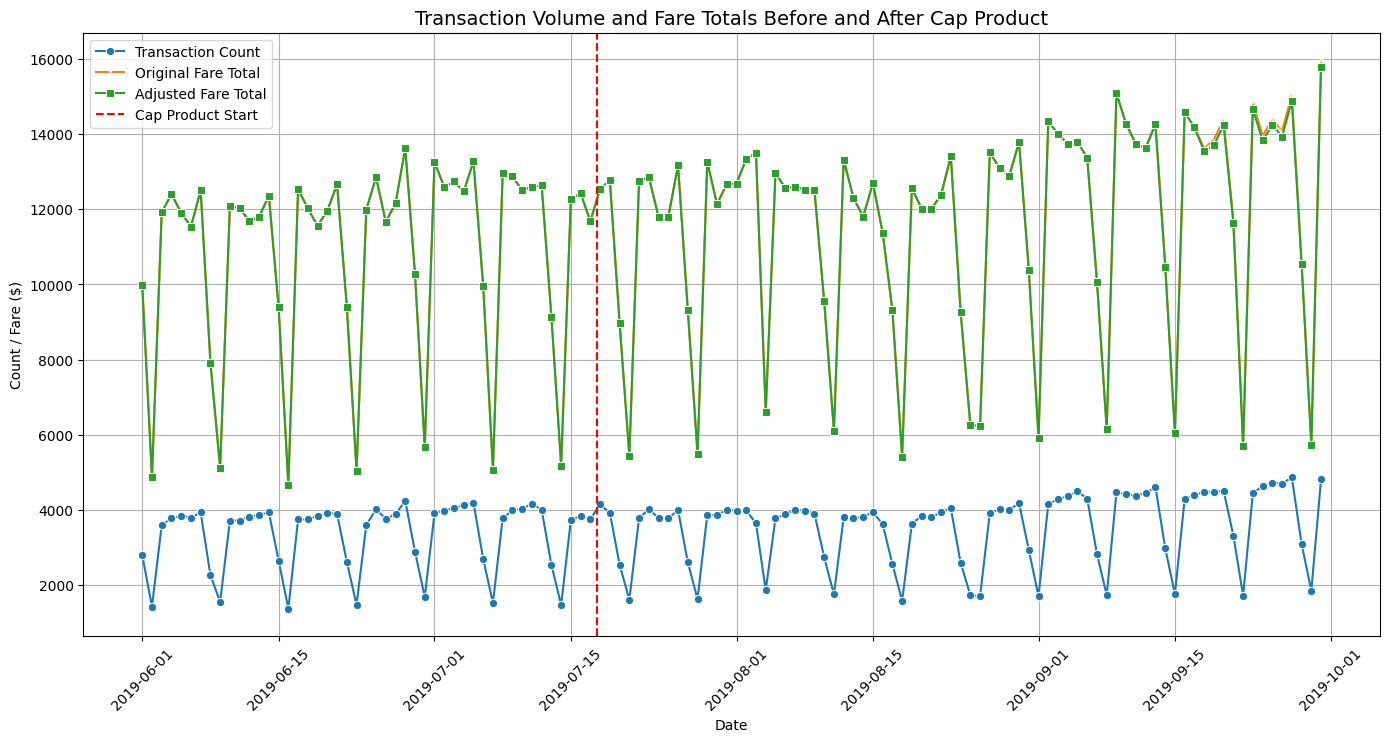

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trip_df = pd.read_csv("trips.csv", parse_dates=["tap_on_date"]) 
product_df = pd.read_csv("products.csv", parse_dates=["start_date_utc"])
 
cap_products = product_df[

    (product_df["product_type"] == "CAPPING") &
    (product_df["capping_type"] == "DAILY_CAP") &
    (product_df["status"] == "ACTIVE")

]
 
product_start_date = cap_products["start_date_utc"].min() #earliest product date
product_start_date = product_start_date.tz_localize(None) #timezone removed
 

trip_df["trip_date"] = trip_df["tap_on_date"].dt.date
 
daily_summary = trip_df.groupby("trip_date").agg({

    "trip_id": "count",
    "original_amount": "sum",
    "adjusted_amount": "sum"

}).reset_index().rename(columns={"trip_id": "transaction_count"})
 
daily_summary["cap_status"] = daily_summary["trip_date"].apply(

    lambda x: "Before Cap" if pd.to_datetime(x) < product_start_date else "After Cap"

)

daily_summary["trip_date"] = pd.to_datetime(daily_summary["trip_date"])
 
#visualization
plt.figure(figsize=(14, 7))

sns.lineplot(data=daily_summary, x="trip_date", y="transaction_count", label="Transaction Count", marker="o")

sns.lineplot(data=daily_summary, x="trip_date", y="original_amount", label="Original Fare Total", marker="x")

sns.lineplot(data=daily_summary, x="trip_date", y="adjusted_amount", label="Adjusted Fare Total", marker="s")

plt.axvline(product_start_date, color='red', linestyle='--', label='Cap Product Start')
 
plt.title("Transaction Volume and Fare Totals Before and After Cap Product", fontsize=14)

plt.xlabel("Date")

plt.ylabel("Count / Fare ($)")

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.xticks(rotation=45)

plt.show()


Key Observations
1. The number of trips increased after the implementation of Capping
2. Even though there is adjustments made after capping project, it didnt make significant impact in the total revene per day
3. The number of travels are the lowest during weekends, Sundays being the lowest
4. Even though the number of travels increased, it took alsmost a month to show a steady increase.
5. The capping system implemented a fair travelling experience for regular commuters